# Logistic Regression Lab
`colour-data.csv` : A data set with almost 4000 data points that we can try to learn with.

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from skimage.color import lab2rgb


# representative RGB colours for each label, for nice display
COLOUR_RGB = {
    'red': (255, 0, 0),
    'orange': (255, 114, 0),
    'yellow': (255, 255, 0),
    'green': (0, 230, 0),
    'blue': (0, 0, 255),
    'purple': (187, 0, 187),
    'brown': (117, 60, 0),
    'pink': (255, 187, 187),
    'black': (0, 0, 0),
    'grey': (150, 150, 150),
    'white': (255, 255, 255),
}
name_to_rgb = np.vectorize(COLOUR_RGB.get, otypes=[np.uint8, np.uint8, np.uint8])


def plot_predictions(model, lum=71, resolution=256):
    """
    Create a slice of LAB colour space with given luminance; predict with the model; plot the results.
    """
    wid = resolution
    hei = resolution
    n_ticks = 5

    # create a hei*wid grid of LAB colour values, with L=lum
    ag = np.linspace(-100, 100, wid)
    bg = np.linspace(-100, 100, hei)
    aa, bb = np.meshgrid(ag, bg)
    ll = lum * np.ones((hei, wid))
    lab_grid = np.stack([ll, aa, bb], axis=2)

    # convert to RGB for consistency with original input
    X_grid = lab2rgb(lab_grid)

    # predict and convert predictions to colours so we can see what's happening
    y_grid = model.predict(X_grid.reshape((wid*hei, 3)))
    pixels = np.stack(name_to_rgb(y_grid), axis=1) / 255
    pixels = pixels.reshape((hei, wid, 3))

    # plot input and predictions
    plt.figure(figsize=(10, 5))
    plt.suptitle('Predictions at L=%g' % (lum,))
    plt.subplot(1, 2, 1)
    plt.title('Inputs')
    plt.xticks(np.linspace(0, wid, n_ticks), np.linspace(-100, 100, n_ticks))
    plt.yticks(np.linspace(0, hei, n_ticks), np.linspace(-100, 100, n_ticks))
    plt.xlabel('A')
    plt.ylabel('B')
    plt.imshow(X_grid.reshape((hei, wid, 3)))

    plt.subplot(1, 2, 2)
    plt.title('Predicted Labels')
    plt.xticks(np.linspace(0, wid, n_ticks), np.linspace(-100, 100, n_ticks))
    plt.yticks(np.linspace(0, hei, n_ticks), np.linspace(-100, 100, n_ticks))
    plt.xlabel('A')
    plt.imshow(pixels)

## Start by getting the data: 
1. Read the CSV with Pandas
2. Extract the X values (the R, G, Bcolumns) into a NumPy array and normalise them to the 0-1 range (by dividing by 255: the tools we use will be looking for RGB values 0-1). 
3. Extract the colour words as y values.

In [230]:
# Step 1: Read the CSV file
df = pd.read_csv('colour-data.csv')

# Step 2: Extract the R, G, B columns into a NumPy array
X = df[['R', 'G', 'B']].values

# Step 3: Normalize the RGB values to the 0-1 range by dividing by 255
X_normalized = X / 255.0

# Step 4: Extract the color words as the target variable y
y = df['Label'].values

## Check the shape of these arrays, are they as expected?

In [231]:
print (X.shape)
print (X_normalized.shape)
print (y.shape)

(3950, 3)
(3950, 3)
(3950,)


In [232]:
from sklearn.model_selection import train_test_split
import random
# Will give a 70/15/15 split. The random_state is to seed the random number so you get the same results everytime.
number = 42

# Step 5: Split the data into training, validation, and test sets
X_train, X_remainder, y_train, y_remainder = train_test_split(X_normalized, y, random_state=number, test_size =0.3)
X_valid, X_test, y_valid, y_test = train_test_split(X_remainder, y_remainder, random_state=number, test_size = 0.5)

In [233]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=7500)
model.fit(X_train, y_train)

# Print the validation score
print(model.score(X_valid, y_valid))

0.6925675675675675


In [234]:
from sklearn.metrics import classification_report, confusion_matrix
# Plot the prediction
y_pred = model.predict(X_valid)

In [235]:
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

       black       0.70      0.87      0.77        61
        blue       0.86      0.74      0.79        99
       brown       0.64      0.24      0.35        29
       green       0.73      0.96      0.83       127
        grey       0.49      0.53      0.51        49
      orange       0.75      0.40      0.52        15
        pink       0.50      0.68      0.58        38
      purple       0.72      0.80      0.76        95
         red       0.50      0.30      0.38        50
       white       0.00      0.00      0.00        10
      yellow       1.00      0.32      0.48        19

    accuracy                           0.69       592
   macro avg       0.63      0.53      0.54       592
weighted avg       0.69      0.69      0.67       592



/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [236]:
print(confusion_matrix(y_valid, y_pred))

[[ 53   0   0   7   0   0   0   1   0   0   0]
 [  3  73   0  10   6   0   0   7   0   0   0]
 [  5   0   7   3   4   0   0   1   9   0   0]
 [  2   0   0 122   3   0   0   0   0   0   0]
 [  3   3   0  11  26   0   5   1   0   0   0]
 [  0   0   4   1   0   6   0   0   4   0   0]
 [  0   0   0   0   1   0  26  10   1   0   0]
 [  5   4   0   0   3   0   6  76   1   0   0]
 [  4   5   0   6   2   1   9   8  15   0   0]
 [  1   0   0   0   4   0   4   1   0   0   0]
 [  0   0   0   6   4   1   2   0   0   0   6]]


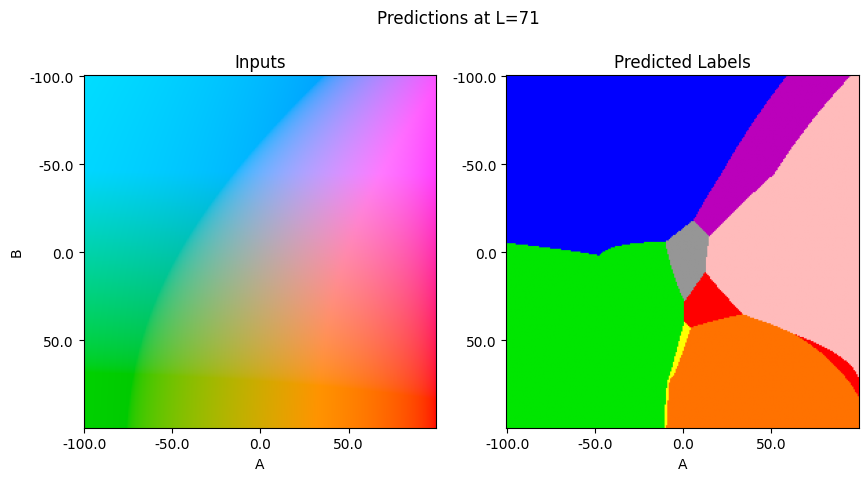

In [237]:
plot_predictions(model)

# What colours is it doing really poorly at? What has happened with “white”?
...

## Lab Model
1. Create a custom function makelab to convert RGB to LAB
2. Create a pipeline with FunctionTransformer and LogisticRegression
3. Train and evaluate the model
4. Plot the images

In [238]:
import numpy as np
from skimage.color import rgb2lab

def makelab(X):
    # Reshape to (1, -1, 3) for rgb2lab conversion
    X = X.reshape(1, -1, 3)
    
    # Convert RGB to LAB
    lab = rgb2lab(X)
    
    # Reshape back to the original shape (-1, 3) for each color
    return lab.reshape(-1, 3)

In [239]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression

# Create the pipeline
model_lab = make_pipeline(
    FunctionTransformer(makelab),
    LogisticRegression(max_iter=7500)
)

In [240]:
# Train the model
model_lab.fit(X_train, y_train)

# Evaluate the model using score
print("Training score:", model_lab.score(X_train, y_train))

# If you want to print a classification report (assuming you have a test set)
from sklearn.metrics import classification_report

# Make predictions
y_pred = model_lab.predict(X_test)

Training score: 0.6853526220614828


In [241]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       black       0.79      0.86      0.82        56
        blue       0.77      0.75      0.76        80
       brown       0.59      0.43      0.50        37
       green       0.85      0.89      0.87       138
        grey       0.56      0.78      0.65        49
      orange       0.67      0.33      0.44        18
        pink       0.77      0.73      0.75        41
      purple       0.72      0.77      0.75        97
         red       0.50      0.44      0.47        48
       white       0.00      0.00      0.00         3
      yellow       0.81      0.65      0.72        26

    accuracy                           0.73       593
   macro avg       0.64      0.60      0.61       593
weighted avg       0.73      0.73      0.72       593



/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


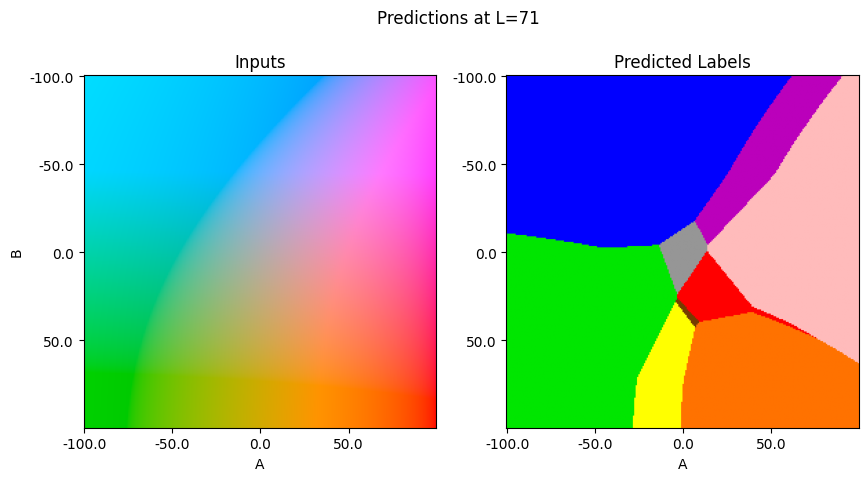

In [242]:
plot_predictions(model_lab)

In [243]:
print(confusion_matrix(y_test, y_pred))

[[ 48   0   2   1   3   0   0   2   0   0   0]
 [  0  60   1   4   6   0   0   9   0   0   0]
 [  4   0  16   3   5   0   0   1   8   0   0]
 [  0   5   3 123   4   0   0   0   0   0   3]
 [  4   2   0   3  38   0   0   1   1   0   0]
 [  0   1   2   1   0   6   1   0   6   0   1]
 [  0   0   0   0   1   0  30   5   5   0   0]
 [  3   7   1   1   5   0   4  75   1   0   0]
 [  1   3   1   4   4   2   3   9  21   0   0]
 [  1   0   0   0   1   0   1   0   0   0   0]
 [  0   0   1   4   1   1   0   2   0   0  17]]


In [244]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_valid)
print(knn.score(X_valid, y_valid))
print(classification_report(y_valid, y_pred))
print(confusion_matrix(y_valid, y_pred))

0.7652027027027027
              precision    recall  f1-score   support

       black       0.85      0.84      0.84        61
        blue       0.82      0.84      0.83        99
       brown       0.57      0.72      0.64        29
       green       0.85      0.92      0.88       127
        grey       0.57      0.73      0.64        49
      orange       0.86      0.80      0.83        15
        pink       0.66      0.76      0.71        38
      purple       0.78      0.83      0.81        95
         red       0.75      0.24      0.36        50
       white       0.44      0.40      0.42        10
      yellow       1.00      0.47      0.64        19

    accuracy                           0.77       592
   macro avg       0.74      0.69      0.69       592
weighted avg       0.77      0.77      0.75       592

[[ 51   2   2   3   1   0   0   2   0   0   0]
 [  0  83   0   6   3   0   0   7   0   0   0]
 [  2   0  21   2   4   0   0   0   0   0   0]
 [  0   4   1 117   4   0  

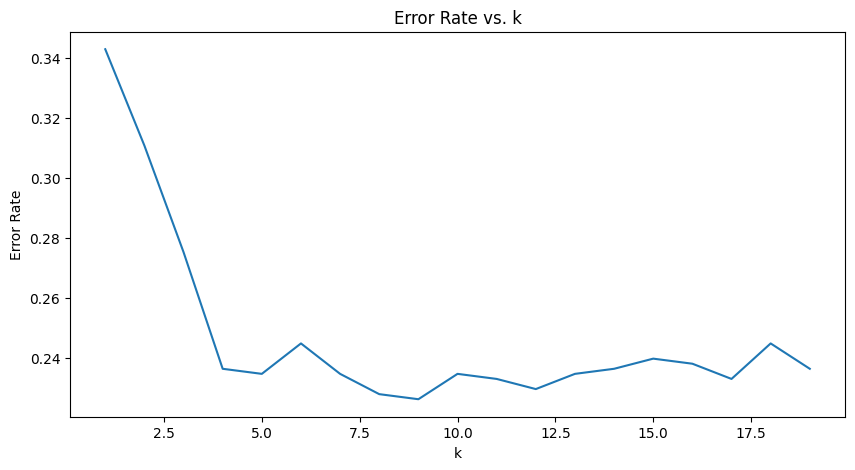

In [245]:
error_rates = []

for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    error_rates.append(1 - knn.score(X_valid, y_valid))

plt.figure(figsize=(10, 5))
plt.plot(range(1, 20), error_rates)
plt.title('Error Rate vs. k')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.show()